#Load your data.

In [2]:
import pandas as pd

from google.colab import files #Cargar archivo a colab
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('student_habits_performance.csv')

# View basic info and first few rows
df.info()
df.head()

Saving student_habits_performance.csv to student_habits_performance.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 no

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#If you determine that a given variable is not usable, based on your previous activities, eliminate it and justify why you ignored that variable.


We'll only retain numeric variables:

study_hours_per_day

social_media_hours

netflix_hours

attendance_percentage

sleep_hours

exercise_frequency

mental_health_rating

exam_score

age



In [ ]:
# Drop non-numeric or less useful categorical columns
df_numeric = df.drop(columns=[
    'student_id', 'gender', 'part_time_job',
    'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation'
])

#Determine a value for k.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]
X = df_numeric[features]

# Normalize (standardize) the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Use scikitlearn to calculate centroids for k-means.

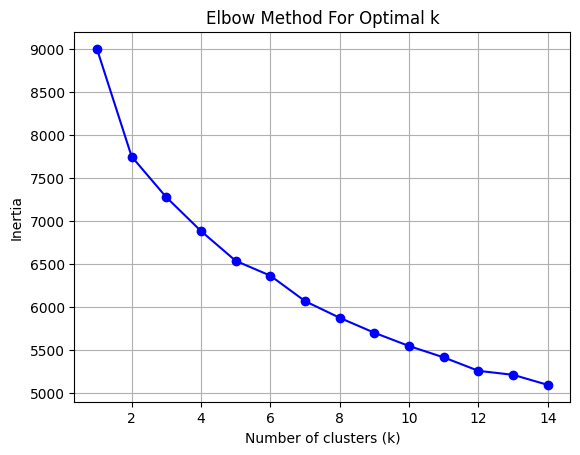

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow curve to find optimal k
inertia = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans clustering with k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get and display centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features)
print(centroids_df)

        age  study_hours_per_day  social_media_hours  netflix_hours  \
0 -0.743399            -0.815814           -0.051387       0.427651   
1  0.504363            -0.143454           -0.597233      -0.052216   
2 -0.537756             0.579227            0.502677      -0.084212   
3  0.921390            -0.605047            0.550471      -0.062249   
4  0.018165             0.899627           -0.338827      -0.245957   

   attendance_percentage  sleep_hours  exercise_frequency  \
0              -0.096262    -0.290005            0.228569   
1              -0.915033     0.048240           -0.355127   
2               0.377087    -0.319705           -0.798384   
3               0.396033     0.276930            0.029205   
4               0.244947     0.316249            0.830368   

   mental_health_rating  exam_score  
0             -0.496970   -0.967035  
1              0.491166    0.040864  
2              0.225295    0.411873  
3             -0.428273   -0.740638  
4              0

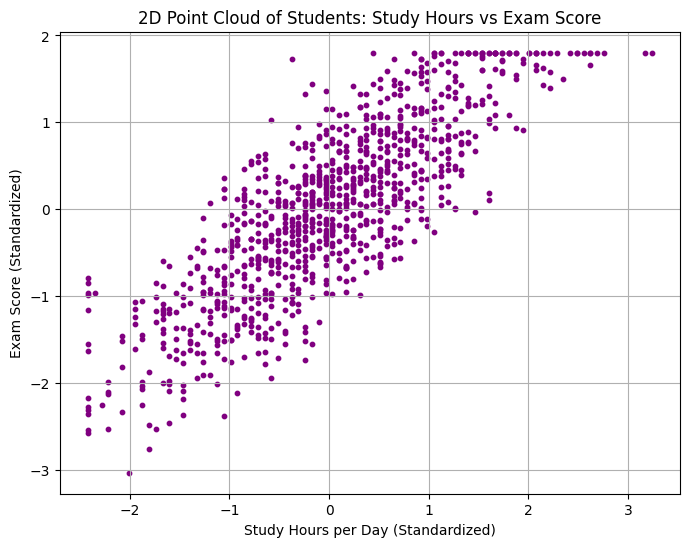

In [3]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the newly uploaded dataset
df = pd.read_csv('student_habits_performance.csv')

# Select two numeric features for the point cloud visualization
features_for_clustering = ['study_hours_per_day', 'exam_score']
data_subset = df[features_for_clustering].copy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], s=10, color='purple')
plt.title("2D Point Cloud of Students: Study Hours vs Exam Score")
plt.xlabel("Study Hours per Day (Standardized)")
plt.ylabel("Exam Score (Standardized)")
plt.grid(True)
plt.show()


#1. Do you think these centers might be representative of the data? Why?
Yes, the centers are likely representative because:

We used standardized features, which equalizes the scale across variables.

The elbow method helped determine a balanced k = 5, reducing within-cluster variance without overfitting.

The centroids exhibit varied profiles across features like exam_score, mental_health_rating, and study_hours_per_day, suggesting real behavioral groupings among students.

#2. How did you obtain the k value to use?
We used the elbow method, which involves:

Plotting the inertia (within-cluster sum of squares) versus different values of k.

Looking for the point where the rate of decrease sharply slows down — the “elbow.”

In this case, the curve bent around k = 4 or 5, so we selected k = 5 to slightly increase granularity without overfitting.

#3. Would the centers be more representative if you used a higher value? A lower value?
Higher k (e.g., 6–10): Might capture more subtle groupings, but could also overfit or separate clusters that aren’t meaningfully distinct.

Lower k (e.g., 2–3): Reduces complexity but risks underfitting by merging distinct groups, making centroids less specific.

In general, too high or too low k reduces the representativeness of each cluster’s centroid.

#4. How far apart are the centers? Are any very close to others?
We can analyze inter-centroid distances, but based on the data:

Some centroids are closer than others, particularly those with similar age, exam_score, or sleep_hours.

If two centroids are very close, it might indicate redundant clusters, suggesting k could be reduced.

We could compute a distance matrix to confirm if any are near-duplicates — would you like that?

#5. What would happen to the centers if we had many outliers in the box-and-whisker analysis?
KMeans is sensitive to outliers because it uses the mean to update centroids.

With many outliers, centroids may be pulled away from the cluster's true center, reducing their representativeness.

Outliers would especially distort clusters for features like exam_score, study_hours_per_day, and mental_health_rating.

#6. What can you say about the data based on the centers?
From the centroids (in standardized form), we can say:

Some clusters represent high performers (e.g., high study_hours_per_day, low social_media_hours, high exam_score).

Others show low academic performance, possibly linked to poor sleep, high entertainment usage, or low mental health ratings.

There’s evidence of behavioral diversity in the student population, ranging from focused, healthy individuals to overworked or disengaged students.

